In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

#******************************************************

rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#*******************************************************
%matplotlib notebook

In [42]:
# IMPORTANT
# Please place this code inside 'jupyter' directory at the same level of 'chains', 'montepython', etc directories



# Fill the next variables ---------------------------------------------------

root_dir='../chains/nrk_11-14_local3_f1.5/' 
root_chain='2018-11-14_10000'               
number_of_chains=4   

#----------------------------------------------------------------------------

# Reading the parameter names from .param file ------------------------------

param_file = np.genfromtxt(root_dir+root_chain+'_.paramnames', dtype=None, 
                  delimiter='\t')
#print param_file
size=len(param_file)

print 'There are',size,'free parameters in your model: \n'

params=[]
for i in range(size):
    p=param_file[i,0]
    params.append(p)
print params
print '--------------------------------------------------------------------------------------- \n'

#----------------------------------------------------------------------------

There are 6 free parameters in your model: 

['omega_b ', 'omega_cdm ', 'b0_fld ', 'b1_fld ', 'Omega_Lambda ', 'H0 ']
--------------------------------------------------------------------------------------- 



In [43]:
#----------------------------------------------------------------------------
hiper_table=[]                  #hiper table is a list in which each element is one of your chains
no=number_of_chains+1

print 'ordering chain components . . . \n'

for i in range(1,no):
    chain_i=np.loadtxt(root_dir+root_chain+'__'+str(i)+'.txt')
    hiper_table.append(chain_i)

    
#-----------------------------------------------------------------------------------------

chain0=hiper_table[0]

# OJO, acá abajo sólo estamos haciendo las operaciones para UNA cadena, hay que optimizar para TODAS las cadenas

table=[]
for i in range(0,len(params)):         # this moves counter from i=0 to i=max(params)
    vector_i=chain0[:,i+2]             #        e.g. if len(params)=6, it moves from i=0 to i=5
    print vector_i
    table.append(vector_i)

print '''\n --------------------------------------------------------------------------------------- \n 
our big table is now: \n'''
print table

ordering chain components . . . 

[ 2.23067   2.257001  2.284913 ...,  2.998642  2.982211  2.986408]
[ 0.1174075   0.1160453   0.1156327  ...,  0.08986643  0.09216685
  0.09516079]
[-0.8901919 -0.8672855 -0.873362  ..., -0.7732628 -0.7518515 -0.8576582]
[-0.3388813 -0.374862  -0.368752  ..., -0.5812369 -0.5736906 -0.5470123]
[ 0.6774227  0.6795917  0.6807339 ...,  0.7342564  0.7272752  0.7271724]
[ 65.81174  65.7739   65.85974 ...,  67.15723  66.88026  67.6946 ]

 --------------------------------------------------------------------------------------- 
 
our big table is now: 

[array([ 2.23067 ,  2.257001,  2.284913, ...,  2.998642,  2.982211,
        2.986408]), array([ 0.1174075 ,  0.1160453 ,  0.1156327 , ...,  0.08986643,
        0.09216685,  0.09516079]), array([-0.8901919, -0.8672855, -0.873362 , ..., -0.7732628, -0.7518515,
       -0.8576582]), array([-0.3388813, -0.374862 , -0.368752 , ..., -0.5812369, -0.5736906,
       -0.5470123]), array([ 0.6774227,  0.6795917,  0.6807339, 

In [37]:
# This indexing is made in case H0, omega_b, omega_cdm and Omega_fld are in different order than usual

idx0=params.index('H0 ')
idx1=params.index('omega_b ')
idx2=params.index('omega_cdm ')
idx3=params.index('Omega_Lambda ')
list_idx=[idx0,idx1,idx2,idx3]
print 'The important indexes are', list_idx, ', which correspond to: \n'

print 'H0 =', table[idx0]
print '100*omega_b =',table[idx1]
print 'omega_cdm =',table[idx2]
print 'Omega_Lambda =',table[idx3]
print '''\n --------------------------------------------------------------------------------------- \n
Converting to quantities . . . \n'''

# Now, lets convert H0->h, om_b->Om_b and om_cdm->Om_cdm

h=table[idx0]/100
h2=h**2
om_b=table[idx1]/100
Om_b=om_b/h2
Om_cdm=table[idx2]/h2
Om_lambda=table[idx3]
print 'H0 =',h
print 'Omega_b =',Om_b
print 'Omega_cdm =',Om_cdm
print 'Omega_Lambda =',Om_lambda
print len(om_b)

The important indexes are [5, 0, 1, 4] , which correspond to: 

H0 = [ 66.29917  67.06467  67.89419 ...,  69.81341  68.897    68.38271]
100*omega_b = [ 2.238046  2.226979  2.253729 ...,  2.509247  2.496142  2.508146]
omega_cdm = [ 0.1196782  0.1204149  0.1217694 ...,  0.1183725  0.1184824  0.1209574]
Omega_Lambda = [ 0.6768149  0.6827586  0.6869447 ...,  0.7056471  0.6978093  0.6876972]

 --------------------------------------------------------------------------------------- 

Converting to quantities . . . 

H0 = [ 0.6629917  0.6706467  0.6789419 ...,  0.6981341  0.68897    0.6838271]
Omega_b = [ 0.05091583  0.04951406  0.04889185 ...,  0.05148322  0.05258582
  0.05363647]
Omega_cdm = [ 0.27226942  0.26772729  0.26416358 ...,  0.24286958  0.24960496
  0.25866629]
Omega_Lambda = [ 0.6768149  0.6827586  0.6869447 ...,  0.7056471  0.6978093  0.6876972]
1074


In [44]:
print len(Om_b)
#print len(Om_cdm)
#print len(Om_fld)

sum_total=[]
sum_partial=[]
for k in range(len(Om_b)):
    x=Om_b[k]
    y=Om_cdm[k]
    z=Om_lambda[k]
    suma1=x+y+z
    suma2=x+y
    sum_partial.append(suma2)
    sum_total.append(suma1)

1074


<IPython.core.display.Javascript object>


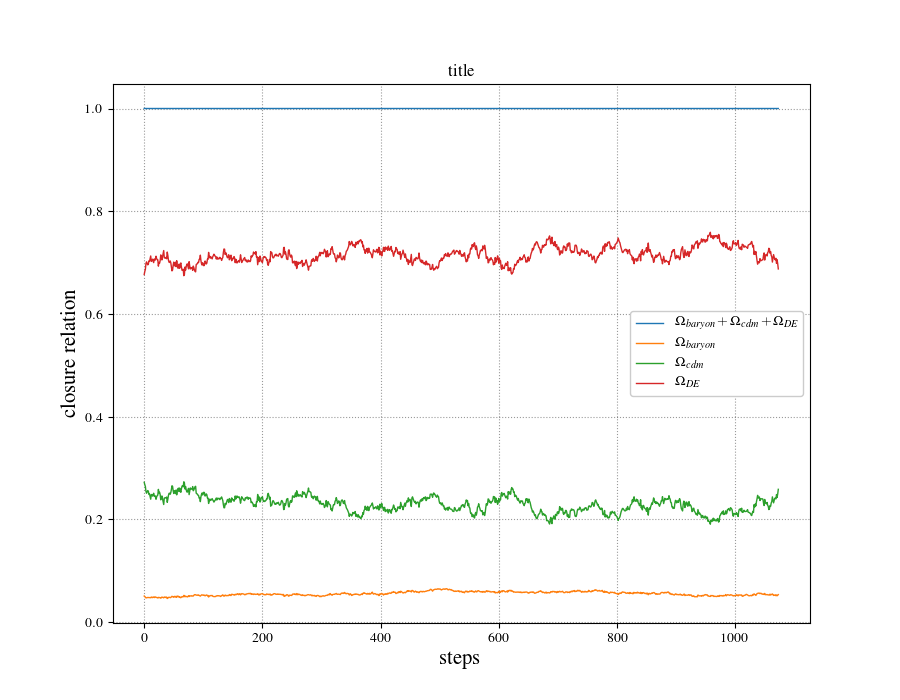

In [45]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(range(len(sum_total)),sum_total,label=r'$\Omega_{baryon}+\Omega_{cdm}+\Omega_{DE}$',alpha=1,linewidth=1)
#ax.plot(range(len(sum_total)),sum_partial,label=r'$\Omega_{baryon}+\Omega_{cdm}$',alpha=1,linewidth=1)
ax.plot(range(len(sum_total)),Om_b,label=r'$\Omega_{baryon}$',alpha=1,linewidth=1)
ax.plot(range(len(sum_total)),Om_cdm,label=r'$\Omega_{cdm}$',alpha=1,linewidth=1)
ax.plot(range(len(sum_total)),Om_lambda,label=r'$\Omega_{DE}$',alpha=1,linewidth=1)

#--------------------------------------------------------------------------------------
ax.legend(loc='best', fancybox=True, framealpha=1)
ax.set_xlabel(r'steps',fontsize=15)
ax.set_ylabel(r'closure relation',fontsize=15)
#ax.set_ylim(bottom=10**-5)
#ax.set_xlim(left=2*10**-5,right=1)
ax.grid(which='major',ls=":", c='black',alpha=0.4)
ax.set_title(r'title');
plt.savefig("closure_relation.pdf")